In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('JPM', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,127.860001,124.779999,127.500000,125.870003,16819900.0,122.054932
2021-01-05,126.300003,123.769997,124.989998,125.650002,13731200.0,122.719070
2021-01-06,132.770004,127.879997,129.880005,131.550003,24909100.0,128.481445
2021-01-07,138.190002,134.919998,135.690002,135.869995,21940400.0,132.700684
2021-01-08,136.350006,134.119995,135.970001,136.020004,12035100.0,132.847198
...,...,...,...,...,...,...
2022-03-29,143.600006,140.240005,143.350006,141.179993,11316500.0,141.179993
2022-03-30,142.119995,139.910004,141.899994,140.539993,8771000.0,140.539993
2022-03-31,140.350006,136.259995,139.830002,136.320007,17353900.0,136.320007


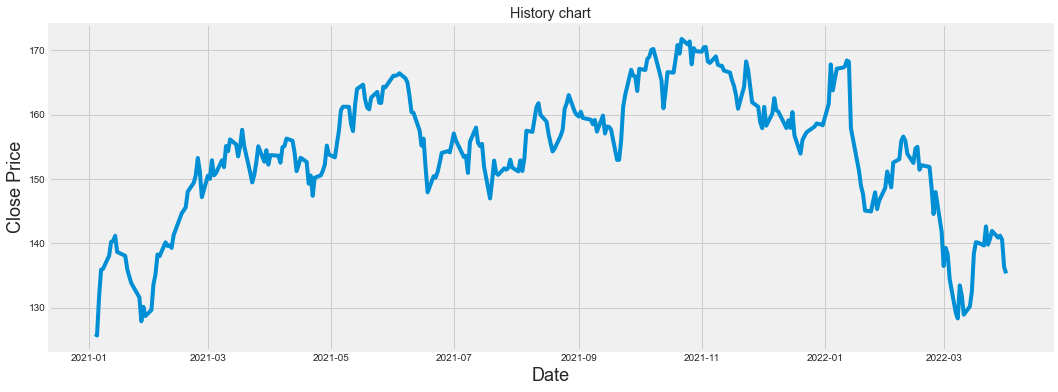

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00476916],
       [0.        ],
       [0.12789946],
       [0.22154767],
       [0.22479955],
       [0.2688056 ],
       [0.31584653],
       [0.31866476],
       [0.33644044],
       [0.28159546],
       [0.26858861],
       [0.22371559],
       [0.19900284],
       [0.17645767],
       [0.14025567],
       [0.12854976],
       [0.04790807],
       [0.09668327],
       [0.06546709],
       [0.086061  ],
       [0.17255581],
       [0.20572292],
       [0.27314111],
       [0.26728799],
       [0.31411226],
       [0.30197271],
       [0.30370698],
       [0.29525262],
       [0.33817471],
       [0.41187933],
       [0.42163464],
       [0.43225658],
       [0.48493397],
       [0.51506619],
       [0.54107957],
       [0.59852579],
       [0.55343578],
       [0.46650765],
       [0.53869499],
       [0.52807272],
       [0.59093873],
       [0.53999561],
       [0.547583  ],
       [0.59093873],
       [0.5675266 ],
       [0.63906363],
       [0.62150461],
       [0.661

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00476916, 0.        , 0.12789946, 0.22154767, 0.22479955,
       0.2688056 , 0.31584653, 0.31866476, 0.33644044, 0.28159546,
       0.26858861, 0.22371559, 0.19900284, 0.17645767, 0.14025567,
       0.12854976, 0.04790807, 0.09668327, 0.06546709, 0.086061  ,
       0.17255581, 0.20572292, 0.27314111, 0.26728799, 0.31411226,
       0.30197271, 0.30370698, 0.29525262, 0.33817471, 0.41187933,
       0.42163464, 0.43225658, 0.48493397, 0.51506619, 0.54107957,
       0.59852579, 0.55343578, 0.46650765, 0.53869499, 0.52807272,
       0.59093873, 0.53999561, 0.547583  , 0.59093873, 0.5675266 ,
       0.63906363, 0.62150461, 0.66117481, 0.6442661 , 0.60394526,
       0.63819633, 0.69369162, 0.63928029, 0.54888362, 0.51615015,
       0.54129623, 0.58313469, 0.63819633, 0.58595259, 0.62497281])]
[0.5761976107572981]

[array([0.00476916, 0.        , 0.12789946, 0.22154767, 0.22479955,
       0.2688056 , 0.31584653, 0.31866476, 0.33644044, 0.28159546,
       0.26858861, 0.22371559, 0.199

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 8s 184ms/step - loss: 0.3029
Epoch 2/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0418
Epoch 3/256
2/2 [==============================] - 0s 189ms/step - loss: 0.0717
Epoch 4/256
2/2 [==============================] - 0s 182ms/step - loss: 0.0218
Epoch 5/256
2/2 [==============================] - 0s 184ms/step - loss: 0.0248
Epoch 6/256
2/2 [==============================] - 0s 181ms/step - loss: 0.0353
Epoch 7/256
2/2 [==============================] - 0s 182ms/step - loss: 0.0283
Epoch 8/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0175
Epoch 9/256
2/2 [==============================] - 0s 186ms/step - loss: 0.0154
Epoch 10/256
2/2 [==============================] - 0s 190ms/step - loss: 0.0205
Epoch 11/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0199
Epoch 12/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0154
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.5267343917889646

C:\Users\ASUS\AppData\Local\Temp/ipykernel_16004/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


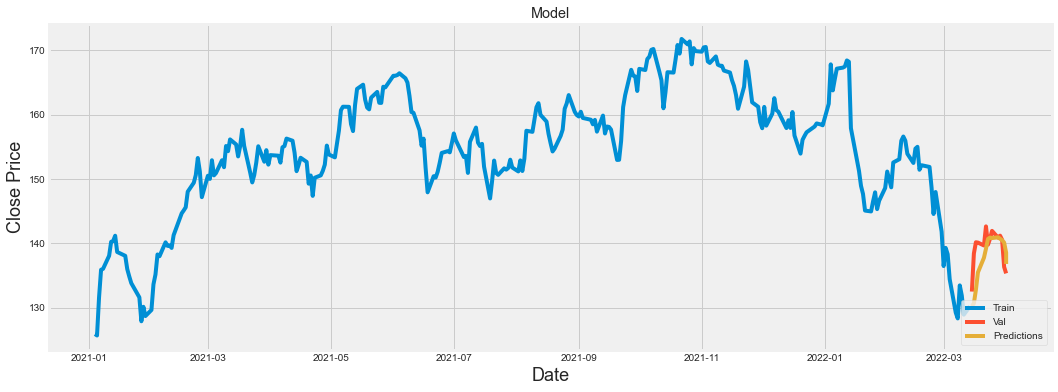

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,132.479996,130.195389
2022-03-16,138.399994,130.650574
2022-03-17,140.149994,132.744904
2022-03-18,140.100006,135.453995
2022-03-21,139.649994,137.746674
2022-03-22,142.619995,139.151947
2022-03-23,139.779999,140.667877
2022-03-24,140.690002,140.882507
2022-03-25,141.919998,140.803268
